# Recommender System

### Task: based on "Squid Game" TV show from Netflix makes another 8 TV shows recommendations

### Libs loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
df = pd.read_csv("/work/Personal_CG_Learning/REBELWAY/Intro_to_Machine_Learning/Source/Datasets/Netflix_TV_Shows_and_Movies.csv")

### Cleaning and Data Preparation

In [3]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [5]:
# Removing Movies from DataFrame and keeping only TV shows
df = df[df['type'] != 'MOVIE']

In [6]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2151.0,1.487,7.000
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,308824.0,130.213,8.301
44,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,34115.0,50.267,7.500


<Axes: >

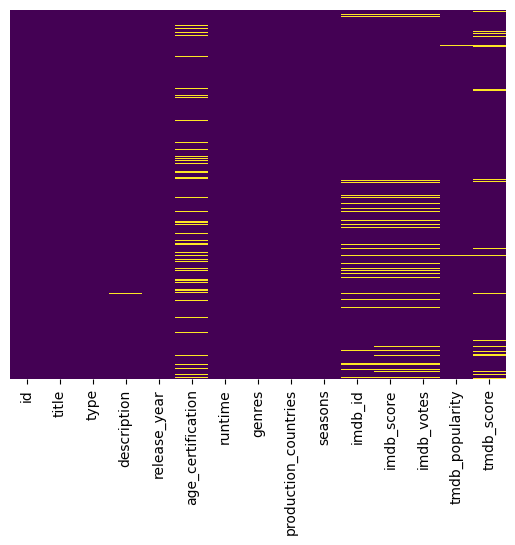

In [7]:
# Cjecking for NaNs
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [8]:
# Checkign for Squid Game TV shows in this particular dataset
print(df[df['title'].str.contains("Squid", case=False, na=False)])

            id       title  type  \
4719  ts220305  Squid Game  SHOW   

                                            description  release_year  \
4719  Hundreds of cash-strapped players accept a str...          2021   

     age_certification  runtime                           genres  \
4719             TV-MA       55  ['action', 'thriller', 'drama']   

     production_countries  seasons     imdb_id  imdb_score  imdb_votes  \
4719               ['KR']      2.0  tt10919420         8.0    426967.0   

      tmdb_popularity  tmdb_score  
4719          361.925       7.821  


In [9]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2151.0,1.487,7.000
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,308824.0,130.213,8.301
44,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,34115.0,50.267,7.500


In [10]:
# Removing unused columns
df.drop(["id", "type", "description", "release_year", "age_certification", "runtime", "seasons", "imdb_id"], inplace=True, axis=1)

In [11]:
df.head()

,title,genres,production_countries,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,Five Came Back: The Reference Films,['documentation'],['US'],NaN,NaN,0.600,NaN
5,Monty Python's Flying Circus,"['comedy', 'european']",['GB'],8.8,73424.0,17.617,8.306
26,Monty Python's Fliegender Zirkus,['comedy'],[],8.1,2151.0,1.487,7.000
35,Seinfeld,['comedy'],['US'],8.9,308824.0,130.213,8.301
44,Knight Rider,"['scifi', 'action', 'crime', 'drama']",['US'],6.9,34115.0,50.267,7.500


In [12]:
df.describe()

,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1939.000000,1.939000e+03,2077.000000,1990.000000
mean,6.977927,1.733155e+04,26.756694,7.480413
std,1.077401,7.208902e+04,87.589718,1.099177
min,2.000000,5.000000e+00,0.600000,0.500000
25%,6.400000,4.580000e+02,3.341000,7.000000
50%,7.100000,1.766000e+03,8.413000,7.500000
75%,7.700000,7.203500e+03,20.099000,8.100000
max,9.600000,1.775990e+06,2226.231000,10.000000


In [13]:
# Preparing a new dataset with specific columns I need
df_tv = pd.DataFrame(df[["title", "genres", "imdb_score", "tmdb_popularity"]])

In [14]:
df_tv.head()

,title,genres,imdb_score,tmdb_popularity
0,Five Came Back: The Reference Films,['documentation'],NaN,0.600
5,Monty Python's Flying Circus,"['comedy', 'european']",8.8,17.617
26,Monty Python's Fliegender Zirkus,['comedy'],8.1,1.487
35,Seinfeld,['comedy'],8.9,130.213
44,Knight Rider,"['scifi', 'action', 'crime', 'drama']",6.9,50.267


In [15]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2106 entries, 0 to 5849
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2106 non-null   object 
 1   genres           2106 non-null   object 
 2   imdb_score       1939 non-null   float64
 3   tmdb_popularity  2077 non-null   float64
dtypes: float64(2), object(2)
memory usage: 82.3+ KB


In [16]:
# Remove rows with NaN
df_tv.dropna(inplace=True)

In [17]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1914 entries, 5 to 5849
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1914 non-null   object 
 1   genres           1914 non-null   object 
 2   imdb_score       1914 non-null   float64
 3   tmdb_popularity  1914 non-null   float64
dtypes: float64(2), object(2)
memory usage: 74.8+ KB


In [18]:
df_tv.head()

,title,genres,imdb_score,tmdb_popularity
5,Monty Python's Flying Circus,"['comedy', 'european']",8.8,17.617
26,Monty Python's Fliegender Zirkus,['comedy'],8.1,1.487
35,Seinfeld,['comedy'],8.9,130.213
44,Knight Rider,"['scifi', 'action', 'crime', 'drama']",6.9,50.267
45,Thomas & Friends,"['animation', 'family', 'comedy', 'fantasy', '...",6.5,42.196


In [20]:
# Checking data type of GENRES colum
print(type(df_tv['genres'].iloc[0]))

<class 'str'>


In [21]:
# Import AST libs for converting data types
import ast

In [22]:
# Convert STR data in cloumn to LIST
df_tv['genres'] = df_tv['genres'].apply(ast.literal_eval)

In [24]:
# Checking data type of GENRES colum again
print(type(df_tv['genres'].iloc[0]))

<class 'list'>


In [25]:
df_tv.head()

,title,genres,imdb_score,tmdb_popularity
5,Monty Python's Flying Circus,"[comedy, european]",8.8,17.617
26,Monty Python's Fliegender Zirkus,[comedy],8.1,1.487
35,Seinfeld,[comedy],8.9,130.213
44,Knight Rider,"[scifi, action, crime, drama]",6.9,50.267
45,Thomas & Friends,"[animation, family, comedy, fantasy, drama, ac...",6.5,42.196


In [26]:
# Reconstract dataset by exploding GENRES colum lists to individual item
df_tv_expl = df_tv.explode('genres')

In [27]:
df_tv_expl.head()

,title,genres,imdb_score,tmdb_popularity
5,Monty Python's Flying Circus,comedy,8.8,17.617
5,Monty Python's Flying Circus,european,8.8,17.617
26,Monty Python's Fliegender Zirkus,comedy,8.1,1.487
35,Seinfeld,comedy,8.9,130.213
44,Knight Rider,scifi,6.9,50.267


In [28]:
# Creating new RATINGS dataset with TITLES and SCORE data
ratings = pd.DataFrame(df_tv_expl.groupby("title")["imdb_score"].mean())

In [29]:
ratings.head()

,imdb_score
title,
(Un)Well,6.4
100 Days My Prince,7.7
100 Humans: Life's Questions. Answered.,5.7
13 Reasons Why,7.5
13 Reasons Why: Beyond the Reasons,6.2


In [30]:
# Adding new TOTAL RATE column
ratings["total rate"] = pd.DataFrame(df_tv_expl.groupby("title")["imdb_score"].count())

In [31]:
ratings.head()

,imdb_score,total rate
title,,
(Un)Well,6.4,2
100 Days My Prince,7.7,6
100 Humans: Life's Questions. Answered.,5.7,2
13 Reasons Why,7.5,2
13 Reasons Why: Beyond the Reasons,6.2,1


### Ploting data

<Axes: >

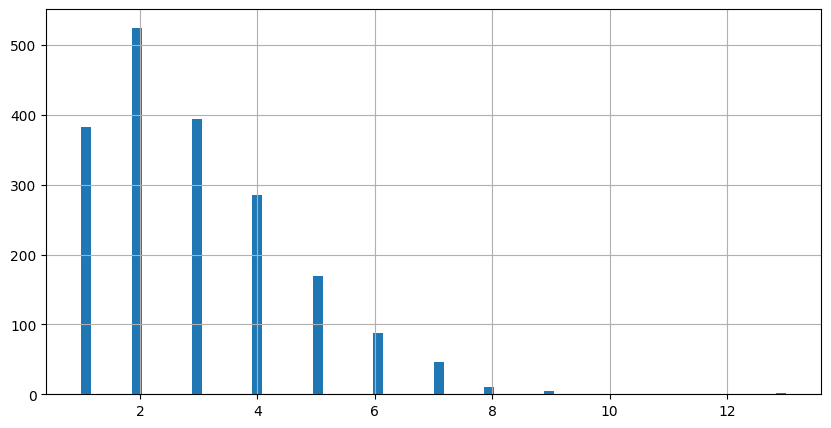

In [32]:
plt.figure(figsize=(10,5))
ratings["total rate"].hist(bins=70)

<Axes: >

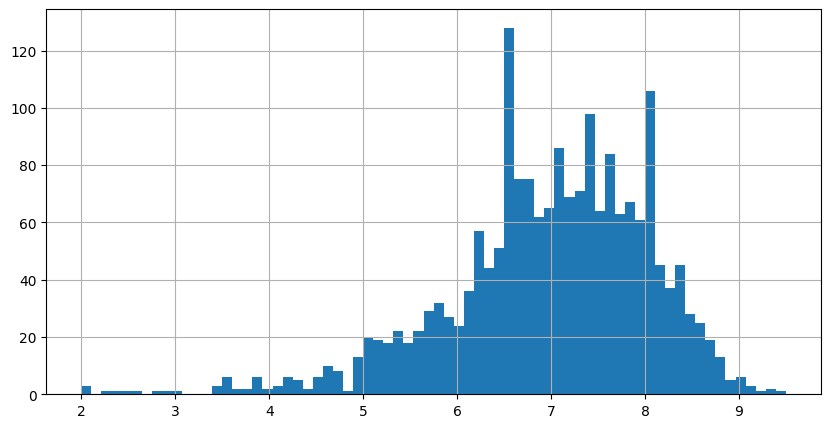

In [33]:
plt.figure(figsize=(10,5))
ratings["imdb_score"].hist(bins=70)

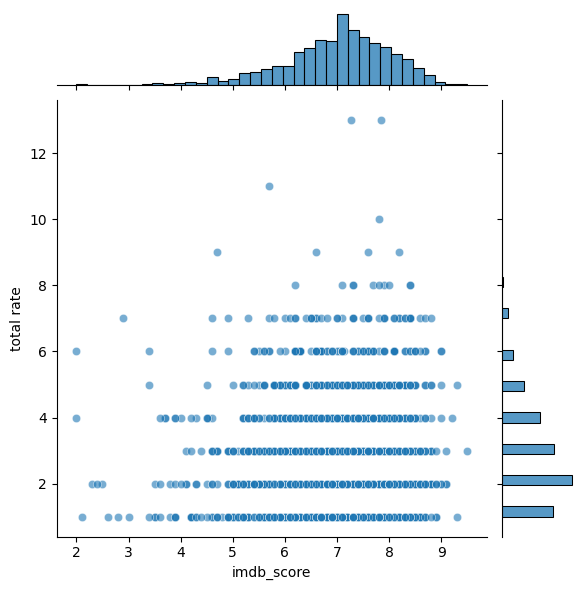

In [34]:
sns.jointplot(x="imdb_score", y="total rate", data=ratings, alpha=0.6)

### Pandas approach for Recommender System

In [35]:
# Making TV shows Matrix
show_matrix = df_tv_expl.pivot_table(index="genres", columns="title", values="imdb_score")

In [36]:
show_matrix.head()

title,(Un)Well,100 Days My Prince,100 Humans: Life's Questions. Answered.,13 Reasons Why,13 Reasons Why: Beyond the Reasons,1983,1994,20 Minutes,2020,3%,...,Zoids Wild,Zoo,Zumbo's Just Desserts,iCarly,iZombie,jeen-yuhs,revisions,Три кота,糖糖Online,냉면 랩소디
genres,,,,,,,,,,,,,,,,,,,,,
action,NaN,7.7,NaN,NaN,NaN,NaN,NaN,7.1,NaN,7.3,...,6.2,NaN,NaN,NaN,NaN,NaN,5.9,NaN,NaN,NaN
animation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,NaN,NaN,NaN,NaN,NaN,5.9,7.0,NaN,NaN
comedy,NaN,7.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.2,NaN,NaN,6.7,7.8,NaN,NaN,7.0,NaN,NaN
crime,NaN,NaN,NaN,NaN,NaN,6.7,NaN,NaN,7.9,NaN,...,NaN,NaN,NaN,NaN,7.8,NaN,NaN,NaN,NaN,NaN
documentation,6.4,NaN,5.7,NaN,6.2,NaN,7.6,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,7.5


In [37]:
show_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, action to western
Columns: 1906 entries, (Un)Well to 냉면 랩소디
dtypes: float64(1906)
memory usage: 283.1+ KB


In [38]:
# Filling NaN data with Null
show_matrix = show_matrix.fillna(0)

In [39]:
# Without this step above I didn't able to calculate CORRELATION data :(

In [40]:
show_matrix.head()

title,(Un)Well,100 Days My Prince,100 Humans: Life's Questions. Answered.,13 Reasons Why,13 Reasons Why: Beyond the Reasons,1983,1994,20 Minutes,2020,3%,...,Zoids Wild,Zoo,Zumbo's Just Desserts,iCarly,iZombie,jeen-yuhs,revisions,Три кота,糖糖Online,냉면 랩소디
genres,,,,,,,,,,,,,,,,,,,,,
action,0.0,7.7,0.0,0.0,0.0,0.0,0.0,7.1,0.0,7.3,...,6.2,0.0,0.0,0.0,0.0,0.0,5.9,0.0,0.0,0.0
animation,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.2,0.0,0.0,0.0,0.0,0.0,5.9,7.0,0.0,0.0
comedy,0.0,7.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.2,0.0,0.0,6.7,7.8,0.0,0.0,7.0,0.0,0.0
crime,0.0,0.0,0.0,0.0,0.0,6.7,0.0,0.0,7.9,0.0,...,0.0,0.0,0.0,0.0,7.8,0.0,0.0,0.0,0.0,0.0
documentation,6.4,0.0,5.7,0.0,6.2,0.0,7.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,7.5


In [41]:
# Identify favorit TV show for future recommendation
favor_show = show_matrix["Squid Game"]

In [42]:
favor_show.head(20)

genres
action           8.0
animation        0.0
comedy           0.0
crime            0.0
documentation    0.0
drama            8.0
european         0.0
family           0.0
fantasy          0.0
history          0.0
horror           0.0
music            0.0
reality          0.0
romance          0.0
scifi            0.0
sport            0.0
thriller         8.0
war              0.0
western          0.0
Name: Squid Game, dtype: float64

In [43]:
# Making correlation matrix
favor_similar_show = show_matrix.corrwith(favor_show)

In [44]:
favor_similar_show.describe()

count    1906.000000
mean        0.182654
std         0.305322
min        -0.330719
25%        -0.102062
50%         0.208333
75%         0.396788
max         1.000000
dtype: float64

In [45]:
favor_corr_df = pd.DataFrame(favor_similar_show, columns=["Correlation"])

In [46]:
favor_corr_df.head()

,Correlation
title,
(Un)Well,-0.148522
100 Days My Prince,0.637377
100 Humans: Life's Questions. Answered.,-0.148522
13 Reasons Why,0.792118
13 Reasons Why: Beyond the Reasons,-0.102062


### Recommender Results (I like it more)

In [47]:
# Applying sorting in the dataframe
favor_corr_df.sort_values("Correlation", ascending=False).head(8)

,Correlation
title,
Squid Game,1.000000
Unriddle,1.000000
Bard of Blood,1.000000
Chosen,0.852136
Hit & Run,0.838525
Fauda,0.838525
Money Heist (Korean Remake),0.838525
Ganglands,0.838525


In [48]:
# Adding TOTAL RATE colum from RATINGS dataframe
favor_corr_df = favor_corr_df.join(ratings["total rate"])

In [50]:
favor_corr_df.head()

,Correlation,total rate
title,,
(Un)Well,-0.148522,2
100 Days My Prince,0.637377,6
100 Humans: Life's Questions. Answered.,-0.148522,2
13 Reasons Why,0.792118,2
13 Reasons Why: Beyond the Reasons,-0.102062,1


### Recommender Result (another version)

In [51]:
# Another recommender system results but with counting users tital rate
favor_corr_df[favor_corr_df['total rate']>4].sort_values("Correlation", ascending=False).head(20)

,Correlation,total rate
title,,
Kakegurui,0.832106,6
Clark,0.724569,5
The Keepers,0.724569,5
Vanished 46,0.724569,5
Dracula,0.724569,5
Money Heist,0.724569,5
Ragnarok,0.724569,5
Jupiter's Legacy,0.724569,5
Arrow,0.724569,5
